In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Exploration and Cleaning

In [29]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/HOC/CDP.xlsx')

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 17 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   Account number                                                                                                                                            4548 non-null   int64  
 1   Organization                                                                                                                                              4548 non-null   object 
 2   Country                                                                                                                                                   45

In [ ]:
questions_of_interest = ['C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?',
                         'C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).',
                         'C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?']

# Selecting only the columns of interest
filtered_df = df[['Account number'] + questions_of_interest]

# Removing rows where all values in the selected columns are missing
filtered_df = filtered_df.dropna(subset= questions_of_interest, how='all')
filtered_df = filtered_df.fillna('Not answered')

In [ ]:
filtered_df.head(20)

Account number  \
0           845296   
1           847157   
2            56726   
3               44   
4              285   
5            47752   
6            33253   
7               45   
8            70086   
9           828233   
10          829232   
11            1535   
12             276   
13           37083   
14          847007   
15              97   
16           41800   
17             282   
18              64   
19           45103   

   C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?  \
0                             Question not applicable                                                   
1                             Question not applicable                                                   
2                             Question not applicable                                                   
3                             Question not applicable                                                   
4                             Question not applicable                                                   
5                             Question not applicable                                                   
6   3SI does not utilize product processes and/or ...                                                   
7                             Question not applicable                                                   
8                             Question not applicable                                                   
9                             Question not applicable                                                   
10                            Question not applicable                                                   
11  A careful review of environment factors, inclu...                                                   
12                            Question not applicable                                                   
13                            Question not applicable                                                   
14                            Question not applicable                                                   
15                            Question not applicable                                                   
16  A AB Plast encontra-se em estruturação da sua ...                                                   
17                            Question not applicable                                                   
18                            Question not applicable                                                   
19                            Question not applicable                                                   

   C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).  \
0                             Question not applicable                                                                                                         
1                             Question not applicable                                                                                                         
2                             Question not applicable                                                                                                         
3   Description of our strategy and approach and h...                                                                                                         
4   For additional information, see 3M's 2020 Sust...                                                                                                         
5                                        Not answered                                                                                                         
6                                        Not answered                                                                                                         
7                             Question not applicable          

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547 entries, 0 to 4547
Data columns (total 4 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                    --------------  ----- 
 0   Account number                                                                                                                                            4547 non-null   int64 
 1   C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?                                                        4547 non-null   object
 2   C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).  4547 no

Only one row got dropped from df to filtered_df

In [ ]:
filtered_df.nunique()

Account number                                                                                                                                              4547
C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?                                                          1257
C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).    1410
C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?                                               473
dtype: int64

In [ ]:
filtered_df['C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?'].value_counts()

In [ ]:
filtered_df['C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).'].value_counts()

In [ ]:
filtered_df['C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?'].value_counts()

The value counts for all 3 columns show that some values are not in english. Lets deal with this first, before getting into preprocessing.

In [ ]:
!pip install langdetect deep_translator

In [ ]:
from tqdm import tqdm
from deep_translator import GoogleTranslator

# Initialize tqdm with the total number of iterations
total_iterations = len(questions_of_interest) * len(filtered_df)
pbar = tqdm(total=total_iterations)

for column in questions_of_interest:
    for index, row in filtered_df.iterrows():
        # Update progress bar
        pbar.update(1)

        text = str(row[column])

        # Exclude instances where the value is 'Question not applicable' or 'Not answered'
        if text.lower() in ['question not applicable', 'not answered']:
            continue

        try:
            # Translate the text to English
            translated_text = GoogleTranslator(source='auto', target='en').translate(text)
        except Exception as e:
            print("Translation Error:", e)
            translated_text = text  # If an error occurs, assign the original text

        filtered_df.at[index, column] = translated_text

# Close progress bar
pbar.close()

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/Colab Notebooks/HOC/CDP_translated.csv', index=False)

### Preporcessing

In [2]:
filtered_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOC/CDP_translated.csv')

In [3]:
filtered_df.head()

Account number  \
0          845296   
1          847157   
2           56726   
3              44   
4             285   

  C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?  \
0                            Question not applicable                                                   
1                            Question not applicable                                                   
2                            Question not applicable                                                   
3                            Question not applicable                                                   
4                            Question not applicable                                                   

  C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).  \
0                            Question not applicable                                                                                                         
1                            Question not applicable                                                                                                         
2                            Question not applicable                                                                                                         
3  Description of our strategy and approach and h...                                                                                                         
4  For additional information, see 3M's 2020 Sust...                                                                                                         

  C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?  
0                            Question not applicable                                                              
1                            Question not applicable                                                              
2                            Question not applicable                                                              
3                            Question not applicable                                                              
4                            Question not applicable

In [4]:
# Filtered dataframes
C31C_df = filtered_df[~filtered_df['C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?'].isin(['Question not applicable', 'Not answered'])][['Account number', 'C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?']]
C31F_df = filtered_df[~filtered_df['C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).'].isin(['Question not applicable', 'Not answered'])][['Account number', 'C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).']]
C31G_df = filtered_df[~filtered_df['C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?'].isin(['Question not applicable', 'Not answered'])][['Account number', 'C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?']]

In [5]:
C31C_df.rename(columns={C31C_df.columns[1]: 'Text'}, inplace=True)
C31F_df.rename(columns={C31F_df.columns[1]: 'Text'}, inplace=True)
C31G_df.rename(columns={C31G_df.columns[1]: 'Text'}, inplace=True)

In [6]:
remove = ['0','123','N.A.','N/A.','[Blank]','a','any','n.a.','nan','x','ー']
C31F_df = C31F_df[~C31F_df['Text'].isin(remove)]

In [9]:
C31C = C31C_df['Text'].astype(str)
C31F = C31F_df['Text'].astype(str)
C31G = C31G_df['Text'].astype(str)

In [10]:
print(len(C31C))
print(len(C31F))
print(len(C31G))

1281
1492
471


In [11]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

# Function to preprocess text
def preprocess_text(text):

    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove punctuation and irrelevant characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '' , text)

    # Lowercase the text
    text = text.lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [12]:
C31C_preprocessed = C31C.apply(preprocess_text)
C31F_preprocessed = C31F.apply(preprocess_text)
C31G_preprocessed = C31G.apply(preprocess_text)

### Feature Extraction using Tf-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer for TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text for each series
C31C_tfidf_features = tfidf_vectorizer.fit_transform(C31C_preprocessed)
#C31C_tfidf_df = pd.DataFrame(C31C_tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
C31F_tfidf_features = tfidf_vectorizer.fit_transform(C31F_preprocessed)
#C31F_tfidf_df = pd.DataFrame(C31F_tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
C31G_tfidf_features = tfidf_vectorizer.fit_transform(C31G_preprocessed)
#C31G_tfidf_df = pd.DataFrame(C31G_tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Print the shape of the TF-IDF features
print("\nC31C TF-IDF Features Shape:", C31C_tfidf_features.shape)
print("C31F TF-IDF Features Shape:", C31F_tfidf_features.shape)
print("C31G TF-IDF Features Shape:", C31G_tfidf_features.shape)


C31C TF-IDF Features Shape: (1281, 5354)
C31F TF-IDF Features Shape: (1492, 13996)
C31G TF-IDF Features Shape: (471, 1964)


### Dimentionality reduction using SVD

In [14]:
from sklearn.decomposition import TruncatedSVD

def find_ideal_n_components(features, desired_variance_ratio=0.95):
    # Initialize TruncatedSVD with maximum possible components
    svd = TruncatedSVD(n_components=min(features.shape), random_state=42)

    # Fit the SVD on features
    svd.fit(features)

    # Calculate the cumulative explained variance ratio
    cumulative_explained_variance_ratio = np.cumsum(svd.explained_variance_ratio_)

    # Determine the ideal value of n_components that achieves the desired explained variance ratio
    ideal_n_components = np.argmax(cumulative_explained_variance_ratio >= desired_variance_ratio) + 1

    return ideal_n_components

In [15]:
# List to store ideal number of components for TF-IDF features of each question
ideal_n_components_tfidf = []

# Find ideal number of components for TF-IDF features of each question
for tfidf_features in [C31C_tfidf_features, C31F_tfidf_features, C31G_tfidf_features]:
    ideal_n_components_tfidf.append(find_ideal_n_components(tfidf_features))

print("Ideal Number of Components for TF-IDF features of each question:", ideal_n_components_tfidf)

Ideal Number of Components for TF-IDF features of each question: [860, 983, 335]


In [16]:
# Initialize TruncatedSVD for TF-IDF features using ideal number of components
svd_tfidf_C31C = TruncatedSVD(n_components=ideal_n_components_tfidf[0], random_state=42)
svd_tfidf_C31F = TruncatedSVD(n_components=ideal_n_components_tfidf[1], random_state=42)
svd_tfidf_C31G = TruncatedSVD(n_components=ideal_n_components_tfidf[2], random_state=42)

# Perform dimensionality reduction on TF-IDF features
C31C_tfidf_svd = svd_tfidf_C31C.fit_transform(C31C_tfidf_features)
C31F_tfidf_svd = svd_tfidf_C31F.fit_transform(C31F_tfidf_features)
C31G_tfidf_svd = svd_tfidf_C31G.fit_transform(C31G_tfidf_features)

print("\nC31C TF-IDF SVD Features Shape:", C31C_tfidf_svd.shape)
print("C31F TF-IDF SVD Features Shape:", C31F_tfidf_svd.shape)
print("C31G TF-IDF SVD Features Shape:", C31G_tfidf_svd.shape)


C31C TF-IDF SVD Features Shape: (1281, 860)
C31F TF-IDF SVD Features Shape: (1492, 983)
C31G TF-IDF SVD Features Shape: (471, 335)


### Finding ideal number of clusters for each column using Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

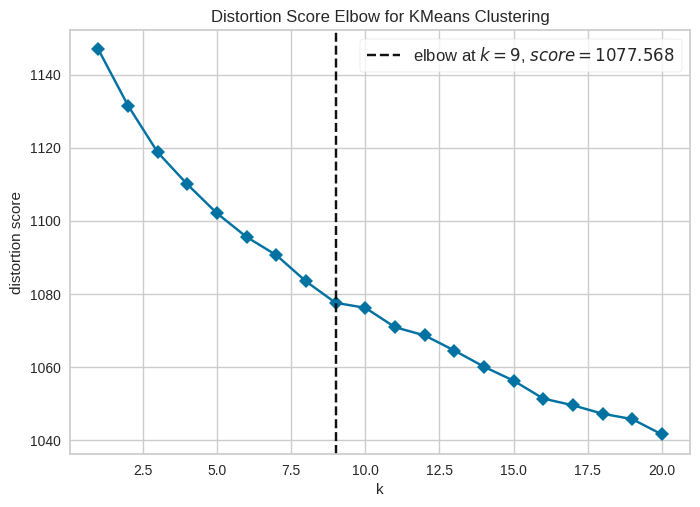

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k_values = range(1, 21)  # Range of k values from 1 to 20 as used by Hussein et al (2021)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=k_values, metric='distortion', timings=False)

# Fit the visualizer to the data
visualizer.fit(C31C_tfidf_svd)

# Visualize the elbow plot
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

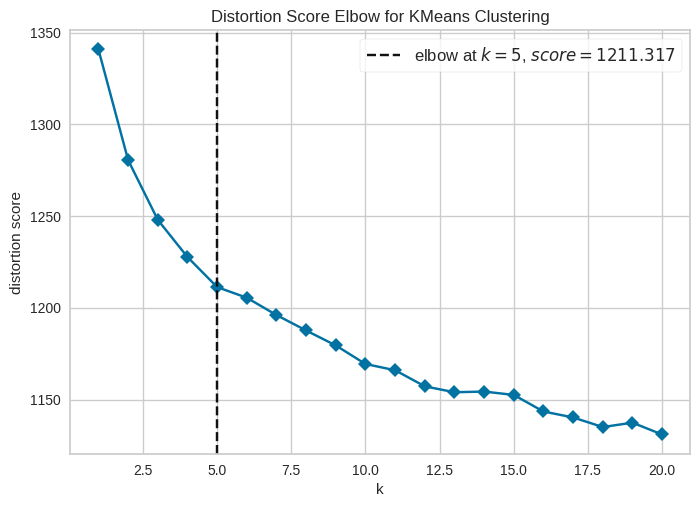

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k_values = range(1, 21)  # Range of k values from 1 to 20 as used by Hussein et al (2021)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=k_values, metric='distortion', timings=False)

# Fit the visualizer to the data
visualizer.fit(C31F_tfidf_svd)

# Visualize the elbow plot
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

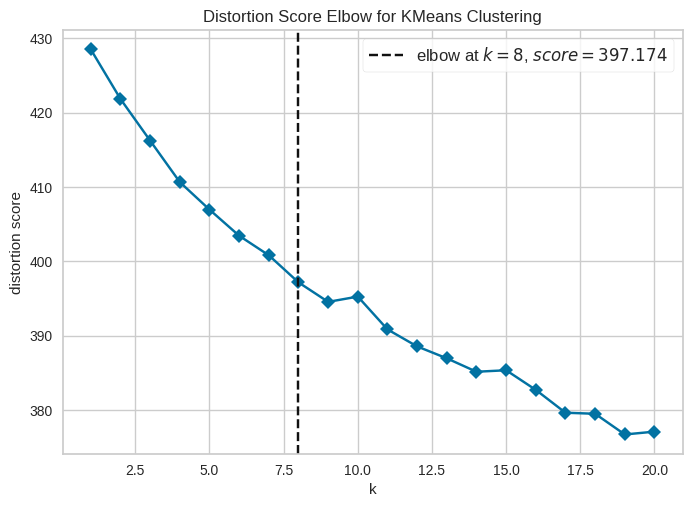

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k_values = range(1, 21)  # Range of k values from 1 to 20 as used by Hussein et al (2021)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=k_values, metric='distortion', timings=False)

# Fit the visualizer to the data
visualizer.fit(C31G_tfidf_svd)

# Visualize the elbow plot
visualizer.show()

### K-Means

In [18]:
from sklearn.cluster import KMeans

# Function to run K-Means clustering and return cluster labels
def run_kmeans_clustering(features, n_clusters):
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    return kmeans.labels_

n_clusters_C31C = 9
n_clusters_C31F = 5
n_clusters_C31G = 8

# Run K-Means clustering for each question content
cluster_labels_C31C = run_kmeans_clustering(C31C_tfidf_svd, n_clusters_C31C)
cluster_labels_C31F = run_kmeans_clustering(C31F_tfidf_svd, n_clusters_C31F)
cluster_labels_C31G = run_kmeans_clustering(C31G_tfidf_svd, n_clusters_C31G)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Add cluster labels to the dataframes
C31C_df['Cluster_Label'] = cluster_labels_C31C
C31F_df['Cluster_Label'] = cluster_labels_C31F
C31G_df['Cluster_Label'] = cluster_labels_C31G

In [20]:
# Print the first few rows of each dataframe to verify
print("C31C DataFrame:")
print(C31C_df.head())
print("\nC31F DataFrame:")
print(C31F_df.head())
print("\nC31G DataFrame:")
print(C31G_df.head())

C31C DataFrame:
   Account number                                               Text  \
6           33253  3SI does not utilize product processes and/or ...   
11           1535  A careful review of environment factors, inclu...   
16          41800  AB Plast is structuring its management regardi...   
22             53  Currently, Abertis does not use climate-relate...   
23             58  At this time, climate-related scenario analysi...   

    Cluster_Label  
6               6  
11              2  
16              4  
22              3  
23              2  

C31F DataFrame:
   Account number                                               Text  \
3              44  Description of our strategy and approach and h...   
4             285  For additional information, see 3M's 2020 Sust...   
16          41800  AB Plast is structuring its management regardi...   
17            282  Sustainability, like innovation, is in the DNA...   
19          45103                         No additiona

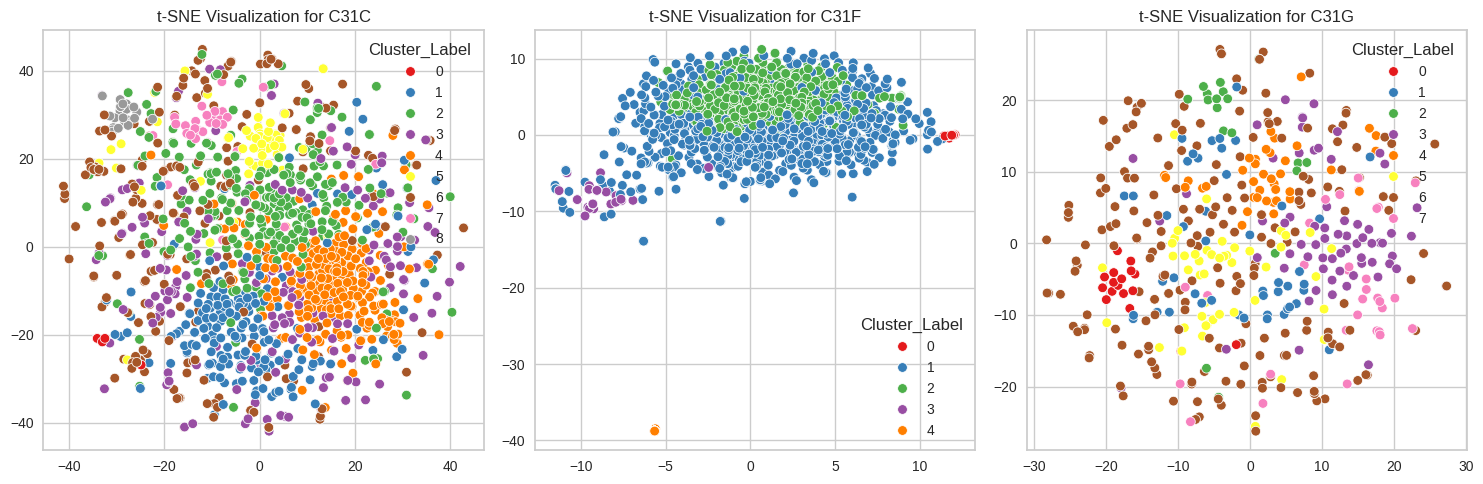

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Combine TF-IDF features with cluster labels for C31C
C31C_combined = pd.DataFrame(C31C_tfidf_svd, columns=[f'Feature_{i}' for i in range(C31C_tfidf_svd.shape[1])])
C31C_combined['Cluster_Label'] = cluster_labels_C31C

# Combine TF-IDF features with cluster labels for C31F
C31F_combined = pd.DataFrame(C31F_tfidf_svd, columns=[f'Feature_{i}' for i in range(C31F_tfidf_svd.shape[1])])
C31F_combined['Cluster_Label'] = cluster_labels_C31F

# Combine TF-IDF features with cluster labels for C31G
C31G_combined = pd.DataFrame(C31G_tfidf_svd, columns=[f'Feature_{i}' for i in range(C31G_tfidf_svd.shape[1])])
C31G_combined['Cluster_Label'] = cluster_labels_C31G

# Initialize t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to each dataframe
C31C_tsne = tsne.fit_transform(C31C_combined.drop(columns=['Cluster_Label']))
C31F_tsne = tsne.fit_transform(C31F_combined.drop(columns=['Cluster_Label']))
C31G_tsne = tsne.fit_transform(C31G_combined.drop(columns=['Cluster_Label']))

# Plot t-SNE embeddings for each dataframe
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=C31C_tsne[:,0], y=C31C_tsne[:,1], hue=C31C_combined['Cluster_Label'], palette='Set1', legend='full')
plt.title('t-SNE Visualization for C31C')

plt.subplot(1, 3, 2)
sns.scatterplot(x=C31F_tsne[:,0], y=C31F_tsne[:,1], hue=C31F_combined['Cluster_Label'], palette='Set1', legend='full')
plt.title('t-SNE Visualization for C31F')

plt.subplot(1, 3, 3)
sns.scatterplot(x=C31G_tsne[:,0], y=C31G_tsne[:,1], hue=C31G_combined['Cluster_Label'], palette='Set1', legend='full')
plt.title('t-SNE Visualization for C31G')

plt.tight_layout()
plt.show()

### Sentiment Scoring

In [22]:
from textblob import TextBlob

# Function to calculate the polarity score for a given text
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to determine sentiment based on polarity score and threshold
def determine_sentiment(polarity_score, threshold=0):
    if polarity_score > threshold:
        return 'Positive'
    elif polarity_score < -threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Function to score each cluster for sentiment
def score_cluster_sentiment(cluster_texts):
    polarity_scores = [calculate_polarity(text) for text in cluster_texts]
    avg_polarity_score = sum(polarity_scores) / len(polarity_scores)
    sentiment = determine_sentiment(avg_polarity_score)
    return avg_polarity_score, sentiment

In [45]:
# Score sentiment for each cluster in C31C
C31C_df['Polarity'] = 0
for cluster_label in range(n_clusters_C31C):
    cluster_texts = C31C_df[C31C_df['Cluster_Label'] == cluster_label]['Text']
    avg_polarity_score, sentiment = score_cluster_sentiment(cluster_texts)
    C31C_df.loc[C31C_df['Cluster_Label'] == cluster_label, 'Polarity'] = avg_polarity_score
    print(f"Cluster {cluster_label+1} in C31C:")
    print(f"Average Polarity Score: {avg_polarity_score}")
    print(f"Sentiment: {sentiment}")
    print()

Cluster 1 in C31C:
Average Polarity Score: 0.0
Sentiment: Neutral

Cluster 2 in C31C:
Average Polarity Score: 0.08768545877642858
Sentiment: Positive

Cluster 3 in C31C:
Average Polarity Score: 0.07351726403835389
Sentiment: Positive

Cluster 4 in C31C:
Average Polarity Score: 0.08347565969125062
Sentiment: Positive

Cluster 5 in C31C:
Average Polarity Score: 0.07102169912223019
Sentiment: Positive

Cluster 6 in C31C:
Average Polarity Score: 0.05334958044970381
Sentiment: Positive

Cluster 7 in C31C:
Average Polarity Score: 0.03172647293923718
Sentiment: Positive

Cluster 8 in C31C:
Average Polarity Score: 0.09826986076986077
Sentiment: Positive

Cluster 9 in C31C:
Average Polarity Score: 0.1175
Sentiment: Positive



In [46]:
# Score sentiment for each cluster in C31F
C31F_df['Polarity'] = 0
for cluster_label in range(n_clusters_C31F):
    cluster_texts = C31F_df[C31F_df['Cluster_Label'] == cluster_label]['Text']
    avg_polarity_score, sentiment = score_cluster_sentiment(cluster_texts)
    C31F_df.loc[C31F_df['Cluster_Label'] == cluster_label, 'Polarity'] = avg_polarity_score
    print(f"Cluster {cluster_label+1} in C31F:")
    print(f"Average Polarity Score: {avg_polarity_score}")
    print(f"Sentiment: {sentiment}")
    print()

Cluster 1 in C31F:
Average Polarity Score: 0.14736527532823832
Sentiment: Positive

Cluster 2 in C31F:
Average Polarity Score: 0.06068459618984201
Sentiment: Positive

Cluster 3 in C31F:
Average Polarity Score: 0.09599181851119966
Sentiment: Positive

Cluster 4 in C31F:
Average Polarity Score: 0.014445970695970697
Sentiment: Positive

Cluster 5 in C31F:
Average Polarity Score: 0.004901960784313725
Sentiment: Positive



In [47]:
# Score sentiment for each cluster in C31G
C31G_df['Polarity'] = 0
for cluster_label in range(n_clusters_C31G):
    cluster_texts = C31G_df[C31G_df['Cluster_Label'] == cluster_label]['Text']
    avg_polarity_score, sentiment = score_cluster_sentiment(cluster_texts)
    C31G_df.loc[C31G_df['Cluster_Label'] == cluster_label, 'Polarity'] = avg_polarity_score
    print(f"Cluster {cluster_label+1} in C31G:")
    print(f"Average Polarity Score: {avg_polarity_score}")
    print(f"Sentiment: {sentiment}")
    print()

Cluster 1 in C31G:
Average Polarity Score: -0.17329392087413478
Sentiment: Negative

Cluster 2 in C31G:
Average Polarity Score: -0.011174507465323794
Sentiment: Negative

Cluster 3 in C31G:
Average Polarity Score: 0.013333333333333336
Sentiment: Positive

Cluster 4 in C31G:
Average Polarity Score: 0.07030243256787443
Sentiment: Positive

Cluster 5 in C31G:
Average Polarity Score: -0.003249629338915053
Sentiment: Negative

Cluster 6 in C31G:
Average Polarity Score: -0.00260465335354205
Sentiment: Negative

Cluster 7 in C31G:
Average Polarity Score: 0.013735410215820662
Sentiment: Positive

Cluster 8 in C31G:
Average Polarity Score: 0.006909242191500253
Sentiment: Positive



### Saving to excel

In [50]:
merged_df = pd.merge(df, C31C_df[['Account number','Cluster_Label', 'Polarity']], on='Account number', how='left')
merged_df.rename(columns={'Cluster_Label': 'C31C_Cluster_Label', 'Polarity': 'C31C_Polarity'}, inplace=True)
merged_df = pd.merge(merged_df, C31F_df[['Account number','Cluster_Label', 'Polarity']], on='Account number', how='left')
merged_df.rename(columns={'Cluster_Label': 'C31F_Cluster_Label', 'Polarity': 'C31F_Polarity'}, inplace=True)
merged_df = pd.merge(merged_df, C31G_df[['Account number','Cluster_Label', 'Polarity']], on='Account number', how='left')
merged_df.rename(columns={'Cluster_Label': 'C31G_Cluster_Label', 'Polarity': 'C31G_Polarity'}, inplace=True)

In [51]:
merged_df = merged_df[['Account number',
 'Organization',
 'Country',
 'Primary activity',
 'Primary sector',
 'Primary industry',
 'ISINs',
 'Authority types',
 'RowName',
 'C2.1_Does your organization have a process for identifying, assessing, and responding to climate-related risks and opportunities?',
 'C2.3_Have you identified any inherent climate-related risks with the potential to have a substantive financial or strategic impact on your business?',
 'C2.4_Have you identified any climate-related opportunities with the potential to have a substantive financial or strategic impact on your business?',
 'C3.1_Have climate-related risks and opportunities influenced your organization’s strategy and/or financial planning?',
 'C3.1a_Does your organization use climate-related scenario analysis to inform its strategy?',
 'C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?',
 'C31C_Cluster_Label',
 'C31C_Polarity',
 'C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).',
 'C31F_Cluster_Label',
 'C31F_Polarity',
 'C3.1g_Why have climate-related risks and opportunities not influenced your strategy and/or financial planning?',
 'C31G_Cluster_Label',
 'C31G_Polarity']]

In [53]:
merged_df.head()

Account number                  Organization  \
0          845296                2M2 STUDIO LTD   
1          847157  37 Interactive Entertainment   
2           56726                      3E LOGIS   
3              44                      3i Group   
4             285                    3M Company   

                                             Country  \
0  United Kingdom of Great Britain and Northern I...   
1                                              China   
2                                              Spain   
3  United Kingdom of Great Britain and Northern I...   
4                           United States of America   

              Primary activity                     Primary sector  \
0  Other professional services  Specialized professional services   
1                     Software          IT & software development   
2        Logistics - 3rd party   Intermodal transport & logistics   
3               Asset managers                 Financial services   
4          Specialty chemicals                          Chemicals   

          Primary industry          ISINs          Authority types  RowName  \
0                 Services            NaN             Supply Chain      NaN   
1                 Services   CNE1000010N2                 Investor      NaN   
2  Transportation services            NaN             Supply Chain      NaN   
3                 Services   GB00B1YW4409                 Investor      NaN   
4                Materials   US88579Y1010   Investor, Supply Chain      NaN   

  C2.1_Does your organization have a process for identifying, assessing, and responding to climate-related risks and opportunities?  \
0                                                Yes                                                                                  
1                                                Yes                                                                                  
2                                                 No                                                                                  
3                                                Yes                                                                                  
4                                                Yes                                                                                  

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  C3.1a_Does your organization use climate-related scenario analysis to inform its strategy?  \
0                            Question not applicable                                           
1                            Question not applicable                                           
2                            Question not applicable                                           
3                  Yes, qualitative and quantitative                                           
4                  Yes, qualitative and quantitative                                           

  C3.1c_Why does your organization not use climate-related scenario analysis to inform its strategy?  \
0                            Question not applicable                                                   
1                            Question not applicable                                                   
2                            Question not applicable                                                   
3                            Question not applicable                                                   
4                            Question not applicable                                                   

  C31C_Cluster_Label C31C_Polarity  \
0                NaN           NaN   
1                NaN           NaN   
2                NaN           NaN   
3                NaN           NaN   
4                NaN           NaN   

  C3.1f_Provide any additional information on how climate-related risks and opportunities have influenced your strategy and financial planning (optional).  \
0       

In [54]:
merged_df.to_excel('/content/drive/MyDrive/Colab Notebooks/HOC/CDP_final.xlsx', index=False)

### Word Cloud Analysis

In [26]:
C31C_df['Cluster_Label'].value_counts()

2    274
4    260
6    223
3    200
1    183
5     64
7     37
8     30
0     10
Name: Cluster_Label, dtype: int64

In [27]:
C31F_df['Cluster_Label'].value_counts()

1    749
2    591
3     91
4     34
0     27
Name: Cluster_Label, dtype: int64

In [28]:
C31G_df['Cluster_Label'].value_counts()

6    201
3     67
1     49
5     47
4     39
7     31
2     20
0     17
Name: Cluster_Label, dtype: int64

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given text
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Word Cloud for Cluster 1 in C31C:


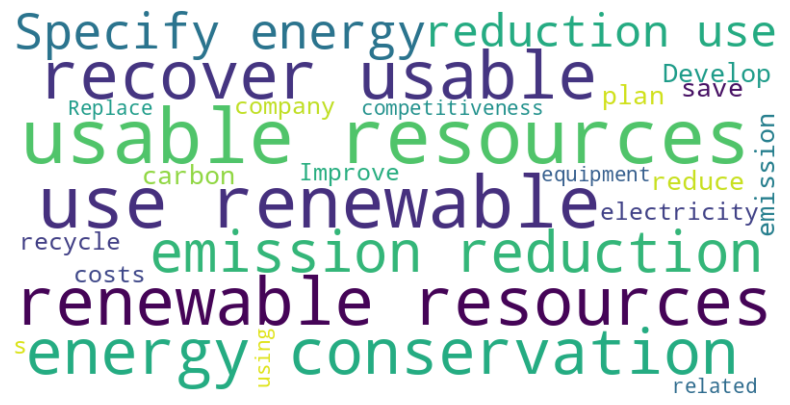

Word Cloud for Cluster 2 in C31C:


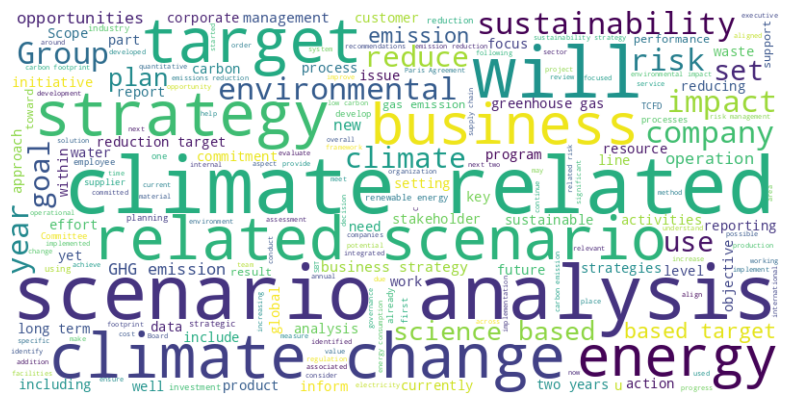

Word Cloud for Cluster 3 in C31C:


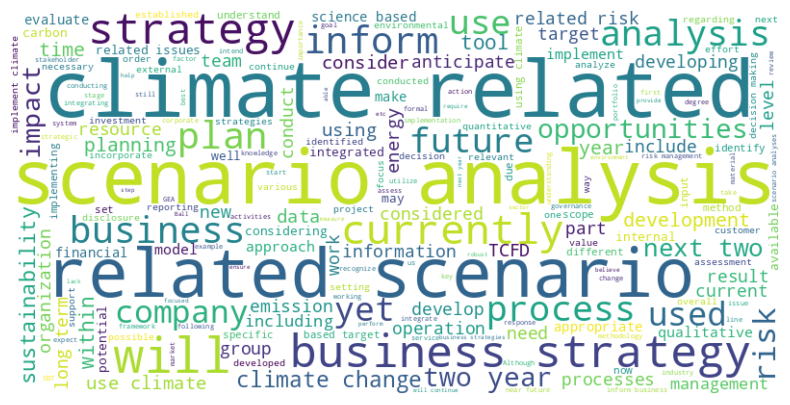

Word Cloud for Cluster 4 in C31C:


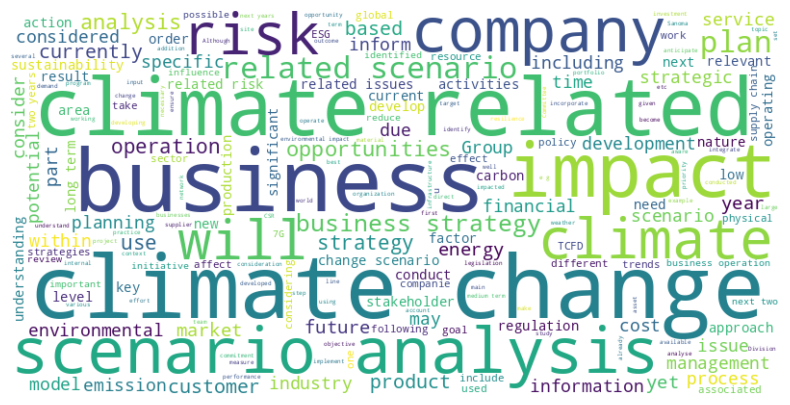

Word Cloud for Cluster 5 in C31C:


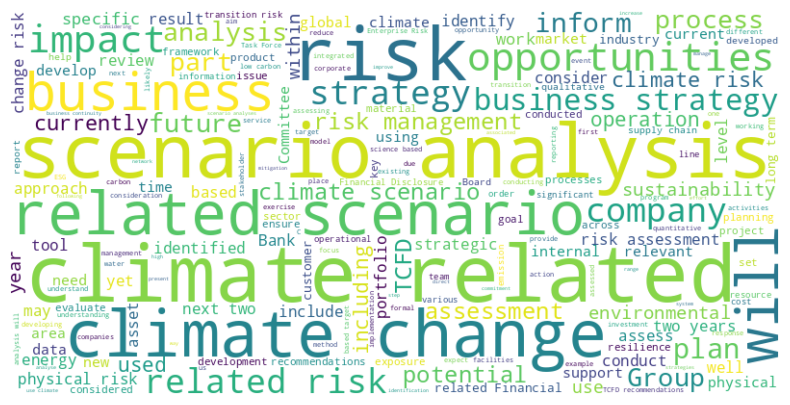

Word Cloud for Cluster 6 in C31C:


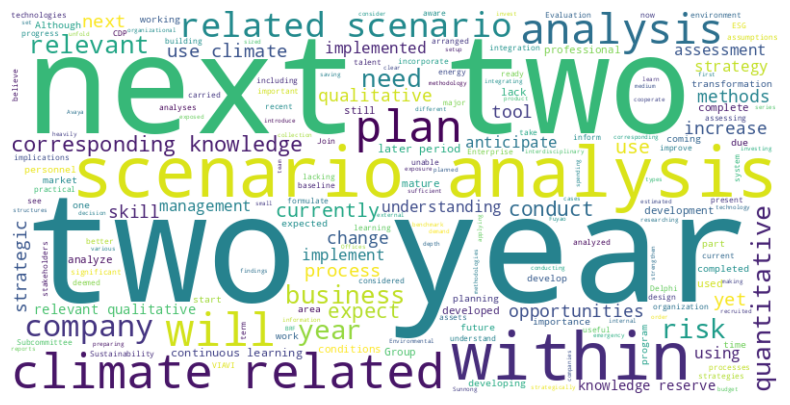

Word Cloud for Cluster 7 in C31C:


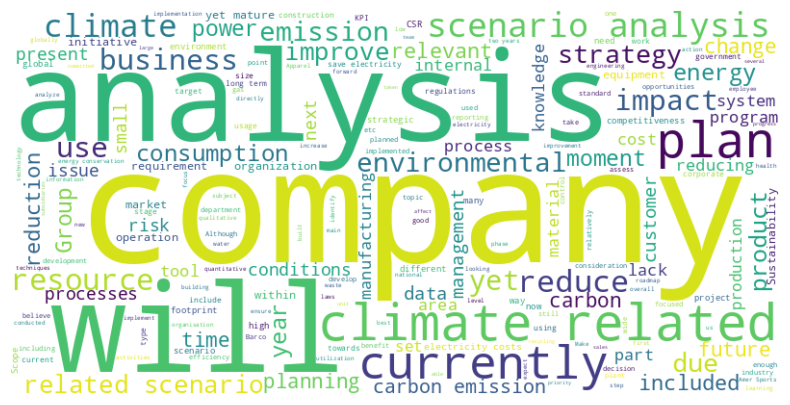

Word Cloud for Cluster 8 in C31C:


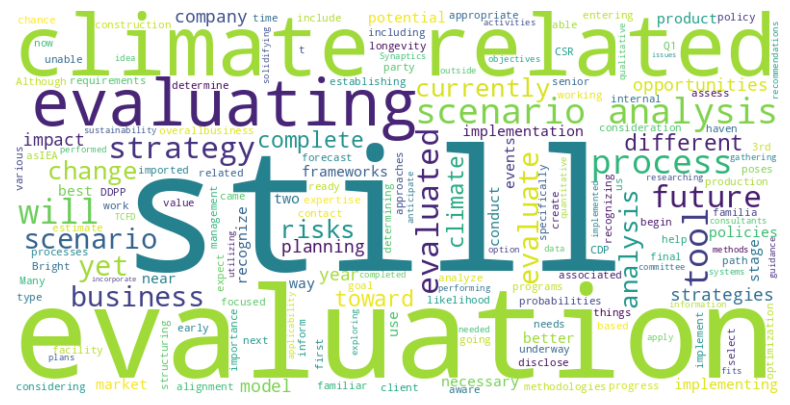

Word Cloud for Cluster 9 in C31C:


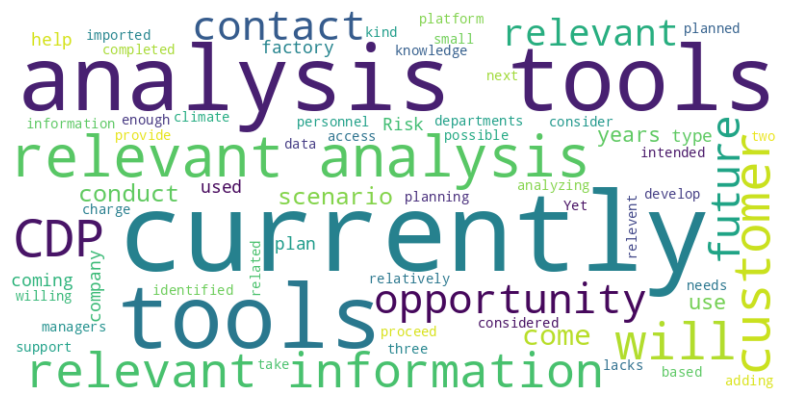

In [56]:
# Generate and plot word clouds for each cluster in C31C_df
for cluster_label in range(n_clusters_C31C):
    # Get texts for the current cluster
    cluster_texts = ' '.join(C31C_df[C31C_df['Cluster_Label'] == cluster_label]['Text'])

    # Generate word cloud for the current cluster
    print(f"Word Cloud for Cluster {cluster_label + 1} in C31C:")
    generate_word_cloud(cluster_texts)

Word Cloud for Cluster 1 in C31F:


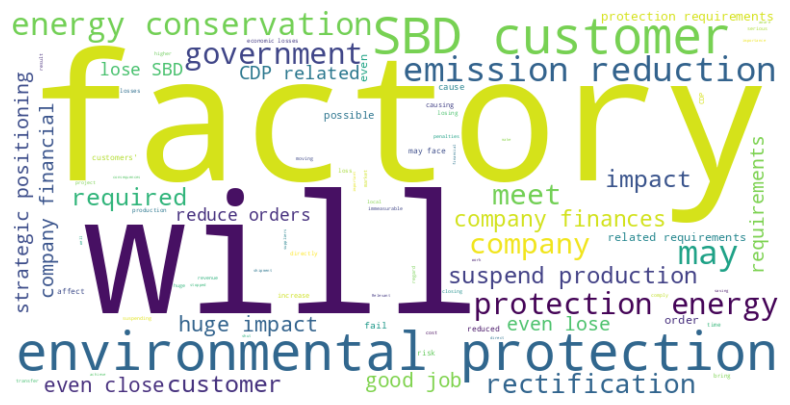

Word Cloud for Cluster 2 in C31F:


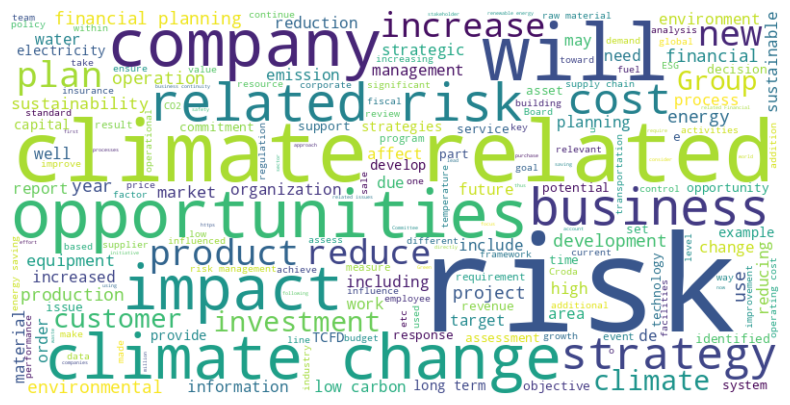

Word Cloud for Cluster 3 in C31F:


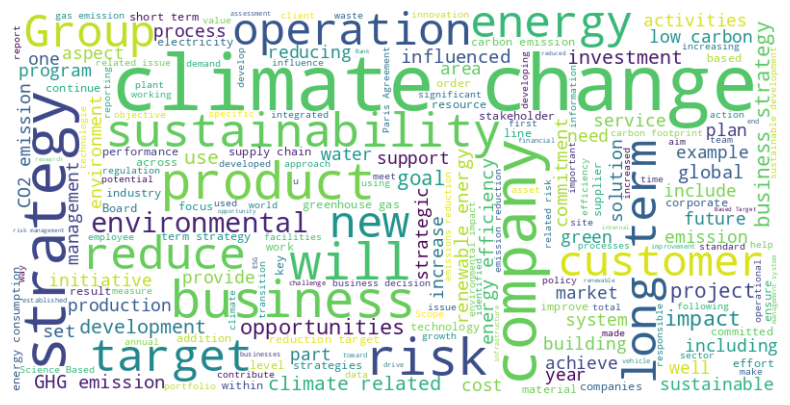

Word Cloud for Cluster 4 in C31F:


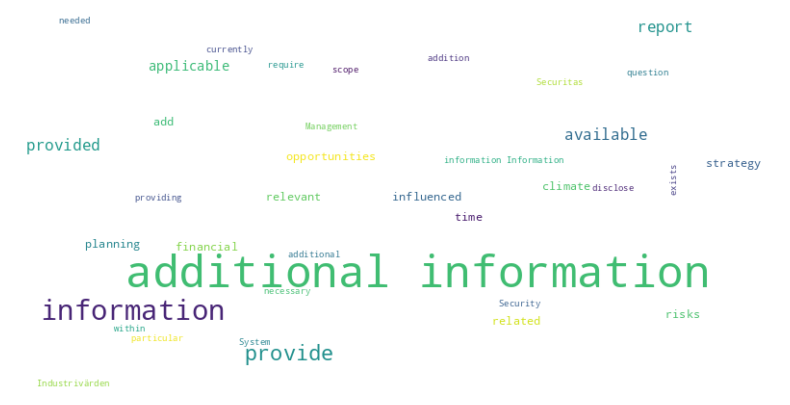

Word Cloud for Cluster 5 in C31F:


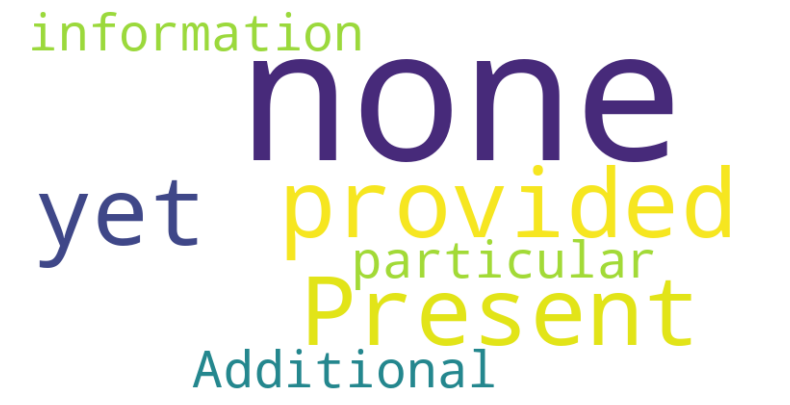

In [57]:
# Generate and plot word clouds for each cluster in C31F_df
for cluster_label in range(n_clusters_C31F):
    # Get texts for the current cluster
    cluster_texts = ' '.join(C31F_df[C31F_df['Cluster_Label'] == cluster_label]['Text'])

    # Generate word cloud for the current cluster
    print(f"Word Cloud for Cluster {cluster_label + 1} in C31F:")
    generate_word_cloud(cluster_texts)

Word Cloud for Cluster 1 in C31G:


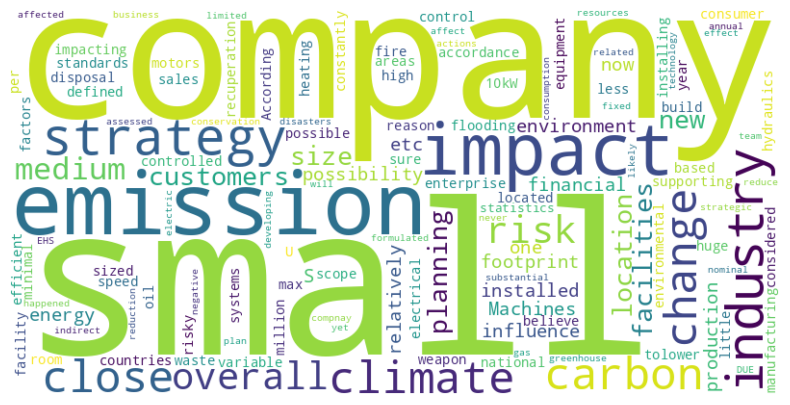

Word Cloud for Cluster 2 in C31G:


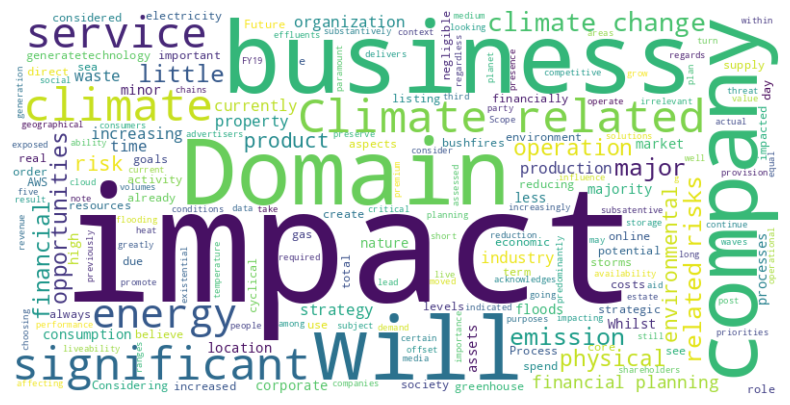

Word Cloud for Cluster 3 in C31G:


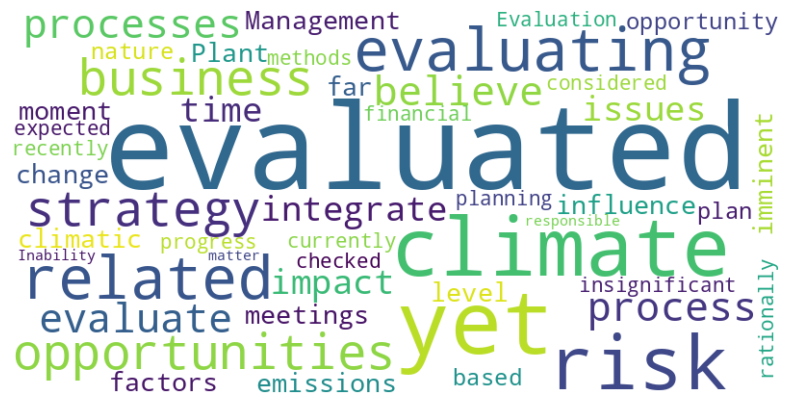

Word Cloud for Cluster 4 in C31G:


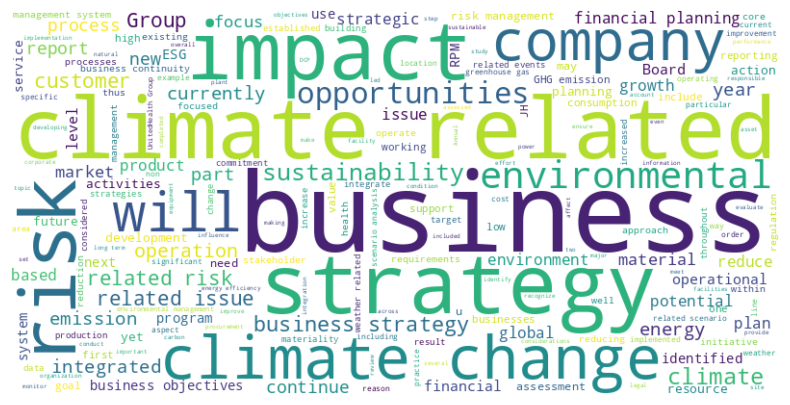

Word Cloud for Cluster 5 in C31G:


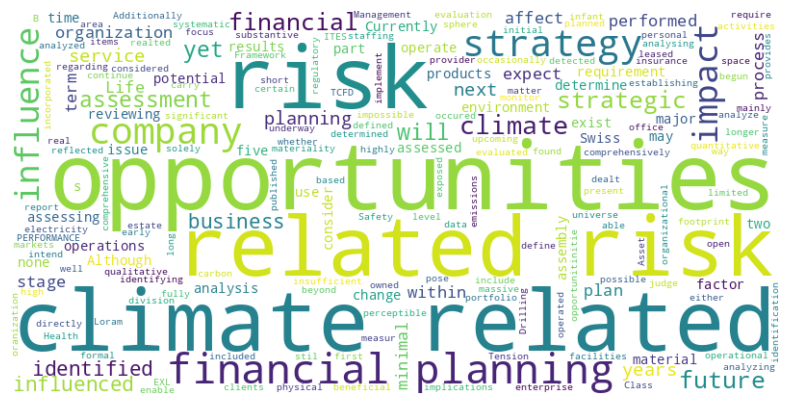

Word Cloud for Cluster 6 in C31G:


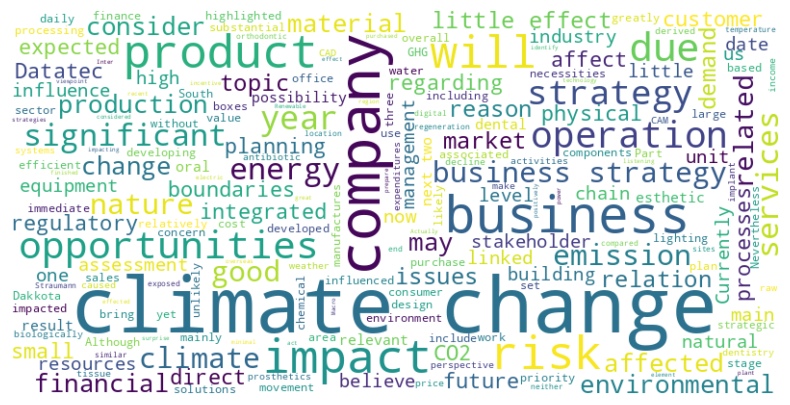

Word Cloud for Cluster 7 in C31G:


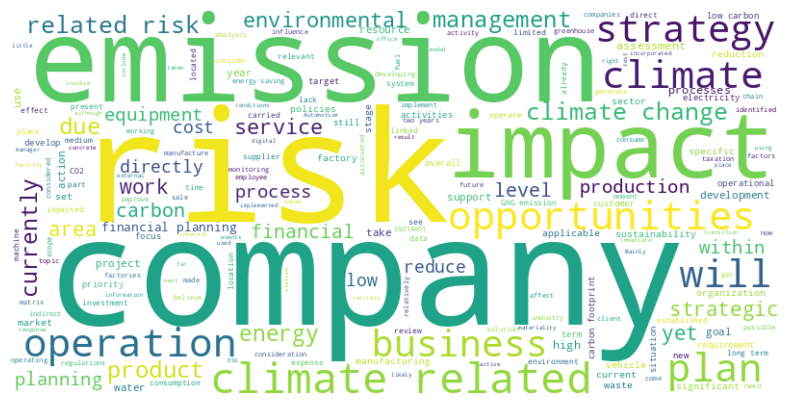

Word Cloud for Cluster 8 in C31G:


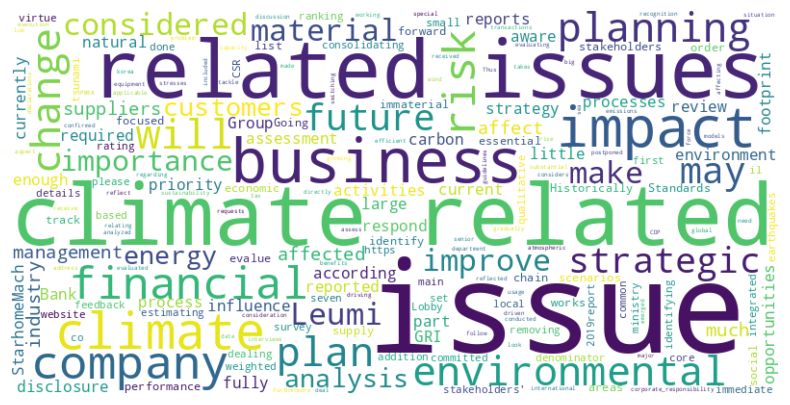

In [58]:
# Generate and plot word clouds for each cluster in C31G_df
for cluster_label in range(n_clusters_C31G):
    # Get texts for the current cluster
    cluster_texts = ' '.join(C31G_df[C31G_df['Cluster_Label'] == cluster_label]['Text'])

    # Generate word cloud for the current cluster
    print(f"Word Cloud for Cluster {cluster_label + 1} in C31G:")
    generate_word_cloud(cluster_texts)

### Extra

In [51]:
# Function to print texts from each dataframe whose length is less than 10
def print_short_texts(df):
    short_texts = df[df['Text'].apply(len) < 10]
    if not short_texts.empty:
        print(f"Number of Short texts (< 10 characters) in the dataframe: {len(short_texts)}")
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        print(short_texts)
        return set(short_texts['Text'])

# Print short texts from C31C_df
print_short_texts(C31C_df)

# Print short texts from C31F_df
unique_short_texts_C31F = print_short_texts(C31F_df)

# Print short texts from C31G_df
print_short_texts(C31G_df)

Number of Short texts (< 10 characters) in the dataframe: 5
     Account number       Text  Cluster_Label Sentiment
729           62295       none              6  Positive
872           28628       none              6  Positive
2516          52279  scheduled              6  Positive
3519         829199   Not sure              6  Positive
4511         828451       none              6  Positive
Number of Short texts (< 10 characters) in the dataframe: 90
     Account number       Text  Cluster_Label Sentiment
15               97        nan              1   Neutral
30              143         NO              0  Positive
83              993  No answer              0  Positive
129             524   OPTIONAL              0  Positive
134          828235   None yet              4  Positive
161           47212        nan              1   Neutral
274           54167        nan              1   Neutral
417           31375       n.a.              0  Positive
424           23318        nan         

{'No impact', 'Not rated', 'none', 'upstream'}

In [52]:
unique_short_texts_C31F

{'- None',
 '0',
 '123',
 'N.A.',
 'N/A.',
 'NIL',
 'NO',
 'Nil',
 'No',
 'No answer',
 'None',
 'None yet',
 'None.',
 'Not yet',
 'Nothing',
 'OPTIONAL',
 'TBD',
 'VOID',
 '[Blank]',
 'a',
 'already',
 'any',
 'cf above',
 'n.a.',
 'nan',
 'no',
 'no effect',
 'none',
 'none.',
 'see above',
 'x',
 'ー'}

In [ ]:
df.nunique()

Account number                                                                                                                                              4548
Organization                                                                                                                                                4548
Country                                                                                                                                                       87
Primary activity                                                                                                                                             196
Primary sector                                                                                                                                                59
Primary industry                                                                                                                                              13
Authority types                   

In [ ]:
df['Authority types'].value_counts()

 Supply Chain              2245
 Investor, Supply Chain    1229
 Investor                  1074
Name: Authority types, dtype: int64

In [ ]:
(df['C2.1_Does your organization have a process for identifying, assessing, and responding to climate-related risks and opportunities?'].value_counts()/ len(df)) * 100

Yes                        79.551451
No                         16.776605
Question not applicable     0.131926
Name: C2.1_Does your organization have a process for identifying, assessing, and responding to climate-related risks and opportunities?, dtype: float64

In [ ]:
(df['C2.3_Have you identified any inherent climate-related risks with the potential to have a substantive financial or strategic impact on your business?'].value_counts()/ len(df)) * 100

Yes    68.183817
No     30.101143
Name: C2.3_Have you identified any inherent climate-related risks with the potential to have a substantive financial or strategic impact on your business?, dtype: float64

In [ ]:
(df['C2.4_Have you identified any climate-related opportunities with the potential to have a substantive financial or strategic impact on your business?'].value_counts()/ len(df)) * 100

Yes                                                                     66.094987
No                                                                      22.427441
Yes, we have identified opportunities but are unable to realize them     9.036939
Name: C2.4_Have you identified any climate-related opportunities with the potential to have a substantive financial or strategic impact on your business?, dtype: float64

In [ ]:
(df['C3.1_Have climate-related risks and opportunities influenced your organization’s strategy and/or financial planning?'].value_counts()/ len(df)) * 100

Yes, and we have developed a low-carbon transition plan    47.405453
Yes                                                        38.478452
No                                                         12.313105
Question not applicable                                     0.131926
Name: C3.1_Have climate-related risks and opportunities influenced your organization’s strategy and/or financial planning?, dtype: float64

In [ ]:
(df['C3.1a_Does your organization use climate-related scenario analysis to inform its strategy?'].value_counts()/ len(df)) * 100

Question not applicable                                                                       31.332454
No, but we anticipate using qualitative and/or quantitative analysis in the next two years    22.845207
Yes, qualitative and quantitative                                                             20.734389
Yes, qualitative                                                                               8.267370
No, and we do not anticipate doing so in the next two years                                    6.574318
Yes, quantitative                                                                              4.265611
Yes, qualitative, but we plan to add quantitative in the next two years                        4.265611
Name: C3.1a_Does your organization use climate-related scenario analysis to inform its strategy?, dtype: float64

In [ ]:
df['Country'].value_counts()[0:10]

United States of America                                913
China                                                   655
Japan                                                   506
United Kingdom of Great Britain and Northern Ireland    277
Brazil                                                  263
Taiwan, Greater China                                   157
Canada                                                  128
France                                                  126
Germany                                                 120
India                                                   112
Name: Country, dtype: int64

In [ ]:
df['Primary sector'].value_counts()[0:15]

Electrical & electronic equipment                     586
Financial services                                    334
Metal products manufacturing                          309
Chemicals                                             276
Food & beverage processing                            238
Plastic product manufacturing                         164
Specialized professional services                     160
Powered machinery                                     158
Paper products & packaging                            132
Media, telecommunications & data center services      129
Transportation equipment                              118
Construction                                          113
Trading, wholesale, distribution, rental & leasing    107
IT & software development                             106
Textiles & fabric goods                                88
Name: Primary sector, dtype: int64

In [ ]:
df['Primary industry'].value_counts()

Manufacturing                    1671
Services                          967
Materials                         477
Food, beverage & agriculture      285
Infrastructure                    237
Retail                            233
Transportation services           210
Biotech, health care & pharma     136
Apparel                           114
Fossil Fuels                       97
Power generation                   76
Hospitality                        41
International bodies                1
Name: Primary industry, dtype: int64